# Lending Club Capstone

**Objective:** You are a data scientist of a start-up investment firm, which plans to invest in the loans of Lending Club.
- Conduct Research and Business Reports to Investigate the potential to invest in Lending Club loans.
- Use Machine Learning to select/construct loan portfolios with superb return-risk profiles.
- Find ways to scale up the portfolios (called portfolio capacity) preserving performance.

**Tasks:**
- What defines good loans vs. bad loans?
- Predict Default Probability
- Use Default Probability to Calculate IRR (Profitability of investments)

##  How does Lending Club compete with the traditional banks? What are the differences in their business models?
- As a lender, why do they get attracted to Lending Club instead of the alternatives in traditional banking
industry?
- As a borrower, how are the loan terms of Lending Club attractive to them?

Lending Club is a peer-to-peer company(P2P) headquartered in San Francisco, California. P2P lending is the practice of lending money to individuals or businessses through online services that match lenders with borrowers. Because their services are online, this allows for these companies to operate at a lower overhead or costs, and thus providing their services more cheaply than traditional financial institutions. This process allows for lenders to earn a higher returns compared to savings and investment products offered by traditional banks, while borrowers can borrow money at lower interest rates.

For Lending Club, and most other P2P lending companies, they make money through a origination and service fees. 

##  Important Vocabulary

**FICO:** 
The FICO score was first introduced in 1989 by Fair, Isaac, and Company (FICO). The FICO model is used by the vast majority of banks and credit grantors and is based on consumer credit files of the three national credit bureaus: Experian, Equifax, and TransUnion. Therefore, FICO scores can vary depending on which bureau provides the information to FICO to generate the score. The exact formulas are kept secret, however, FICO has discoled the following components: 
- Payment History
- Length of Credit History ("time in file")
- Types of Credit Used (installement, revolving, consumer finance, and mortgage)
- Recent seraches for Credit (when consumer apply for a credit card or a loan). 

**Installment Credit vs. Revolving Credit:**
- **Installment Credit**: Borrowers repay installment credit loans with scheduled, periodic payments. This type of credit involves the gradual reduction of principal and eventual full repayment, ending the credit cycle (Ex: Mortgage).
- **Revolving Credit**: Revolving credit allows borrowers to spend the borrowed money, repay it, and spend it again. The lender advances them a set credit limit that can be used all at once or in part (Ex: Credit Card).

**Installment and Amortization**:
A loan is taken where the principal (money originally borrowed) is paid down over the life of the loan according to an *amortization schedule*, typically throguh equal payments. An **installment** is usually a monthly payment that includes pricipal repayment and interest. **Amortization** is the rate at which the installments are extinguishing the debt/principal. Amortization shorten the average duration of the loan money.
   - *Amortization Schedule*: A complete table of periodic loan payments, showing the amount of pricipal and the amount of interest that comprise each payment until the loan is paid off a the end of its term. Each periodic payment is the same amount in total for each period. 

    
**Prepayment Risk:** 
Risk involved with the premature return of principal on a fixed-income security. This risk is held by the lenders since they wouldn't be collecting as much interest if the borrower prepays their loan. Through Lending Club, borrowers may prepay their loans at any time, in whole or in part, without penalty; Lenders get a percentage of the servicing fee.

**In the dataset, a loan is labeled either:**
- Fully Paid: Fully paid off loan.
- Current: Loan is up to date on all outstanding payments.
- Late: Payment was sent after the due date or grace period.
- Grace Period: A period of time creditors give borrowers to make their payments before incurring a late charge or risk defaulting on the loan.
- Default: Failure to make required interest or principal repayments on a loan.
- Charge-off: Lender has written the account off as a loan, and the account is closed to future charges. Having a charge-off can mean serious repercussions on credit history and future borrowing ability.

**Loan Default vs. Loand Delinquent:**
Delinquency means you are behind on payments. Once you are delinquent for a certain period of time (usually 9 months), your lender will declare the loan to be in default.

**Loan Settlement:**
Agreement between a lender and borrower wherein the loan is 'settled' by repaying only a part of the loan. This option is only available if the borrower has a genuine reason for being unable to repay such as a serious injury, medical emergencies, loss of a job, etc.

**Loan Collection:**
Loan collection is the process of purusing payments of debts owed by individuals or businesses. An orginization that specializes in debt collection is known as a collection agency or debt collector.

**Types of risks in investing in Lending Club Loans:**
- Inflation Risk: Inflation eats into real returns, but it's a risk all investments face. Duration.
- Fee Risk: Current management fee is 1%, but could go up or down.
- Marketplace Risk: Lending Club could go bankrupt, in which case it may take time to get your loans back.
- Callable Risk: Loans can be paid off early.
- Liquidity Risk: You can't access your money until the loan is paid in full. You can sell your loan on the secondary market, usually at a discount.
- Economic Risk: Could go through another financial crisis, where defaults rise.


### Pros and Cons of Lending Club

Pros:
- Diversification: You don't want to have all your money in one investment and Lending Club makes it easy to diversify your money across multiple notes.
- Wide Selection: Easily filter and choose investments by loan type, credit score, purpose of loan, etc
- Automated Investing: If you don't have the time or know-how, let Lending Club do the investing for your based on your own parameters
- Low minimum per note: Investors can invest as little as 25 dollars in each note.

Cons:
- Illiquidity: If you want to take money out, you haveto wait until each loan comes due.
- Taxed at Ordinary Income
- 1% Annual Fee: Lending club charges 1% annually per note you own within the marketplace.
- Unsecured Debt: Unlike an auto or home loan, this debt is unsecured. Lending Club cannot collect against an asset if ithe borrower defaults.


### Load Packages and Data

In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder


%matplotlib inline


In [2]:
accepted = pd.read_csv("data/accepted_2007_to_2018Q4.csv")

/Users/thomasouyang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploratory Data Analysis

In [3]:
accepted.shape

(2260701, 151)

In [4]:
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
accepted.head(14)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,Jan-2019,122.67,NaN,Mar-2019,564.00,560.00,0.00,30.00,1.00,Individual,NaN,NaN,NaN,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,Jun-2016,926.35,NaN,Mar-2019,699.00,695.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,

#### Target Variable: Loan Status

Low-risk Loans: Fully Paid

High-risk Loans: Charged Off

In [5]:
loan_status = accepted.groupby('loan_status')[['loan_status']].count()
loan_status['ratio'] = ((loan_status[['loan_status']]/accepted.shape[0])*100).round(2)
loan_status.sort_values(by=["ratio"], ascending=False)

,loan_status,ratio
loan_status,,
Fully Paid,1076751,47.63
Current,878317,38.85
Charged Off,268559,11.88
Late (31-120 days),21467,0.95
In Grace Period,8436,0.37
Late (16-30 days),4349,0.19
Does not meet the credit policy. Status:Fully Paid,1988,0.09
Does not meet the credit policy. Status:Charged Off,761,0.03
Default,40,0.00


In [6]:
# Beyond Delinquency
# Percentage of non-completed loans

high_risk = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']

In [7]:
accepted['loan_completion'] = np.nan

def loan_condition(status):
    if status in high_risk:
        return 'Noncompleted Loan'
    else:
        return 'Completed Loan'


accepted['loan_completion'] = accepted['loan_status'].apply(loan_condition)

In [8]:
accepted['loan_completion'].value_counts()/len(accepted['loan_completion'])

Completed Loan      0.88
Noncompleted Loan   0.12
Name: loan_completion, dtype: float64

This shows we are dealing with an imbalanced dataset. Other metrics such as AUC should be used (besides accuracy) to better understand if our model is working. 

In [9]:
accepted['issue_d']

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
2260699         NaN
2260700         NaN
Name: issue_d, Length: 2260701, dtype: object

In [10]:
accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])
accepted['year'] = pd.DatetimeIndex(accepted['issue_d']).year
accepted['year']

0         2015.00
1         2015.00
2         2015.00
3         2015.00
4         2015.00
            ...  
2260696   2016.00
2260697   2016.00
2260698   2016.00
2260699       NaN
2260700       NaN
Name: year, Length: 2260701, dtype: float64

Text(0, 0.5, ' ')

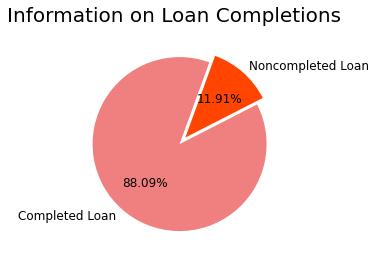

In [11]:
f, ax= plt.subplots()

colors = ['lightcoral', 'orangered']
labels ='Completed Loan', 'Noncompleted Loan'

plt.suptitle('Information on Loan Completions', fontsize=20)

accepted['loan_completion'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


ax.set_ylabel(' ')


Now that we have an idea of what percentage of loans are completed, there are a few variables that one would intuitively think affects probability of default
- Loan Amount 
- Interest Rate
- Loan Term
- Credit Score

#### Values of Loans Issued

In [12]:
loans_issued = accepted.groupby('issue_d')['loan_amnt'].sum().reset_index()
loans_issued['issue_d'] = pd.DatetimeIndex(loans_issued['issue_d']).year
loans_issued = loans_issued.groupby('issue_d').sum().reset_index()


([<matplotlib.axis.YTick at 0x7ff2b05c06d0>,
 [Text(0, 0.0, '0'),
  Text(0, 1000000000.0, '1'),
  Text(0, 2000000000.0, '2'),
  Text(0, 3000000000.0, '3'),
  Text(0, 4000000000.0, '4'),
  Text(0, 5000000000.0, '5'),
  Text(0, 6000000000.0, '6'),
  Text(0, 7000000000.0, '7'),
  Text(0, 8000000000.0, '8'),
  Text(0, 9000000000.0, '9')])

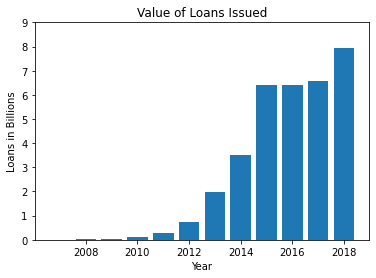

In [13]:
f, ax = plt.subplots()
ax.bar(loans_issued.issue_d, loans_issued.loan_amnt)

ax.set_ylabel('Loans in Billions')
ax.set_xlabel("Year")
ax.set_title("Value of Loans Issued")
plt.yticks(ax.get_yticks(), (ax.get_yticks() / 1000000000).astype(int))

#### Credit Grades Over Time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2007.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2009.0'),
  Text(3, 0, '2010.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2012.0'),
  Text(6, 0, '2013.0'),
  Text(7, 0, '2014.0'),
  Text(8, 0, '2015.0'),
  Text(9, 0, '2016.0'),
  Text(10, 0, '2017.0'),
  Text(11, 0, '2018.0')])

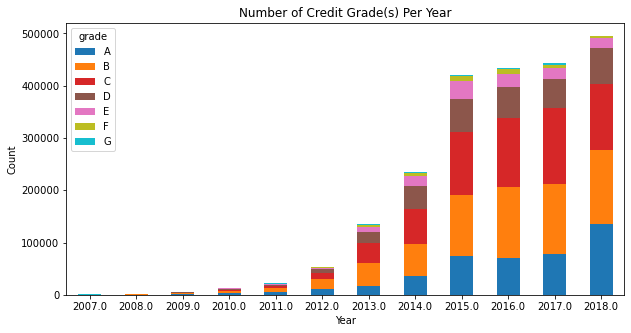

In [14]:

accepted.groupby(['year', 'grade']).size().unstack().plot(kind = 'bar', 
                                                          stacked = True, 
                                                          figsize=(10, 5), 
                                                          cmap = 'tab10')
plt.ylabel('Count')
plt.xlabel("Year")
plt.title("Number of Credit Grade(s) Per Year")
plt.xticks(rotation = 0)

#### Loan Purposes based on Credit Grade

Credit Card and Debt consolidation are the biggest

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G')])

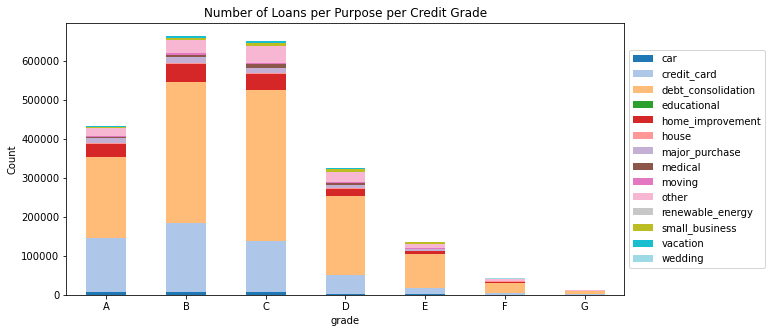

In [15]:

accepted.groupby(['grade', 'purpose']).size().unstack().plot(kind = 'bar', stacked = True, figsize=(10, 5), cmap = 'tab20')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Number of Loans per Purpose per Credit Grade')
plt.ylabel('Count')
plt.xticks(rotation = 0)



#### Credit Score

Majority of Borrowers have a Credit Score of B or C

In [16]:
accepted['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

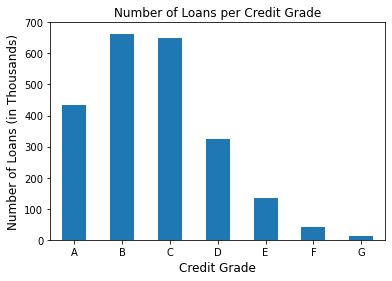

In [17]:
f, ax = plt.subplots()

accepted.groupby(['grade']).size().plot(kind ='bar')

ax.set_ylabel('Number of Loans (in Thousands)', size = 12)
ax.set_xlabel('Credit Grade', size = 12)
ax.set_title('Number of Loans per Credit Grade')

plt.yticks(ax.get_yticks(), (ax.get_yticks() / 1000).astype(int))


ax.tick_params(axis='x', labelrotation = 0)

#### Interest Rates

Inverse Relationship as expected

Text(0.5, 1.0, 'Average Interest Rates per Credit Grade')

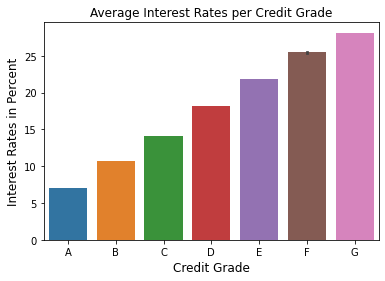

In [18]:
f, ax = plt.subplots()

sns.barplot(x="grade", y='int_rate', data=accepted, dodge = False, order =['A','B','C','D','E','F', 'G']) 
ax.set_ylabel('Interest Rates in Percent', size = 12)
ax.set_xlabel('Credit Grade', size = 12)
ax.set_title('Average Interest Rates per Credit Grade')


#### Loan Terms per Credit Grade

In [19]:
accepted.groupby(['grade','term'])['loan_status'].size()

grade  term      
A       36 months    409181
        60 months     23846
B       36 months    534906
        60 months    128651
C       36 months    419858
        60 months    230195
D       36 months    184199
        60 months    140225
E       36 months     50791
        60 months     84848
F       36 months      8717
        60 months     33083
G       36 months      2102
        60 months     10066
Name: loan_status, dtype: int64

## Feature Selection 

Since we are tackling this project from the prospective of an investor, the probability of the loans is crucial for our success. Since this is a predictive task, we can only use information available at the time loan initialization.

- loan_amnt, term, int_rate, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, loan_status (target), purpose, zip_code, addr_state, dti, earliest_cr_line, fico_range_low, fico_range_high, open_acc, pub_rec, initial_list_status, application_type, annual_inc_joint, dti_joint, verification_status_joint, pub_rec_bankruptcies

Column index: 2,5,6,7,8,9, 11,12,13,14,20,22,23,24,26,27,28,32,33,37,40,56,57,58,59,109

In [20]:
data = accepted.copy()

In [21]:
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [22]:
for e, column in enumerate(data.columns):
    print (e, column)

0 id
1 member_id
2 loan_amnt
3 funded_amnt
4 funded_amnt_inv
5 term
6 int_rate
7 installment
8 grade
9 sub_grade
10 emp_title
11 emp_length
12 home_ownership
13 annual_inc
14 verification_status
15 issue_d
16 loan_status
17 pymnt_plan
18 url
19 desc
20 purpose
21 title
22 zip_code
23 addr_state
24 dti
25 delinq_2yrs
26 earliest_cr_line
27 fico_range_low
28 fico_range_high
29 inq_last_6mths
30 mths_since_last_delinq
31 mths_since_last_record
32 open_acc
33 pub_rec
34 revol_bal
35 revol_util
36 total_acc
37 initial_list_status
38 out_prncp
39 out_prncp_inv
40 total_pymnt
41 total_pymnt_inv
42 total_rec_prncp
43 total_rec_int
44 total_rec_late_fee
45 recoveries
46 collection_recovery_fee
47 last_pymnt_d
48 last_pymnt_amnt
49 next_pymnt_d
50 last_credit_pull_d
51 last_fico_range_high
52 last_fico_range_low
53 collections_12_mths_ex_med
54 mths_since_last_major_derog
55 policy_code
56 application_type
57 annual_inc_joint
58 dti_joint
59 verification_status_joint
60 acc_now_delinq
61 tot_col

In [23]:
df = data.iloc[:,[2,5,6,7,8,9, 
                  11,12,13,14,20,22,23,24,26,27,28,32,33,37,40,56,57,58,59,109]]

## 3.3) Missing Values

In [24]:
df.isnull().sum().sort_values(ascending = False)

verification_status_joint    1319715
dti_joint                    1319513
annual_inc_joint             1319510
emp_length                     78511
pub_rec_bankruptcies             697
dti                              374
zip_code                           1
sub_grade                          0
open_acc                           0
int_rate                           0
installment                        0
grade                              0
application_type                   0
total_pymnt                        0
initial_list_status                0
pub_rec                            0
fico_range_high                    0
home_ownership                     0
fico_range_low                     0
earliest_cr_line                   0
term                               0
addr_state                         0
purpose                            0
verification_status                0
annual_inc                         0
loan_amnt                          0
dtype: int64

Lots of missing data invovle "joint" status. This could just be because not all loan applicants do so with another person. Since the plan is to use XGBoost, which can handle missing errors, the last thing we have to do is label-encode our categorical features.

## Feature Engineering

The purpose of this project is to predict the cashflow. For the lender, this allows them to calculate their percent return, as this number would be relative to the loan amount. For an investor that is offered to purchase these loans, this allows for them to calculate their percent return relative to how much the loan is being sold for.

From our data, we do not have cash flow. However, we have the loan amount, the installments, and the last payment. 
By taking the number of installments paid/total installments and multiplying it by the cash amount of the installment, we can calculate our expected total payment. We also have total payment received. If we take total payment received/expected total payment, we can then calculate the projected percentage of our expected total payment, which will be our target variable.

In [25]:
df['term'].dtypes

dtype('O')

In [26]:
print(df['term'])

0           36 months
1           36 months
2           60 months
4           60 months
5           36 months
              ...    
2260688     60 months
2260690     60 months
2260691     60 months
2260692     60 months
2260697     60 months
Name: term, Length: 1345310, dtype: object


#### Preprocessing: 

Turn 'term' into float so that we can calculate expected total payment.


In [27]:
df['term'] = df['term'].astype(str).str.replace('months','').astype(float)

/var/folders/sj/x46s482s0zs_2rd0g1_25m5r0000gn/T/ipykernel_36493/1416446645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].astype(str).str.replace('months','').astype(float)


In [28]:
df['term'].dtypes

dtype('float64')

In [29]:
df['installment'].dtypes

dtype('float64')

In [30]:
df['expected_total_pymnt'] = df.apply(lambda row: (row['installment']*row['term']), axis = 1)

/var/folders/sj/x46s482s0zs_2rd0g1_25m5r0000gn/T/ipykernel_36493/3394323491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expected_total_pymnt'] = df.apply(lambda row: (row['installment']*row['term']), axis = 1)


In [31]:
df['expected_total_pymnt'].head(5)

0    4429.08
1   29530.08
2   25959.60
4   17394.60
5   14586.48
Name: expected_total_pymnt, dtype: float64

In [32]:
df['projected_total_pymnt_percentage'] = df.apply(lambda row: 
                                                  (row['total_pymnt']/row['expected_total_pymnt']), 
                                                  axis = 1)

/var/folders/sj/x46s482s0zs_2rd0g1_25m5r0000gn/T/ipykernel_36493/3525498915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['projected_total_pymnt_percentage'] = df.apply(lambda row:


Since Total Payment is not available during loan origination, it will be dropped. 

In [33]:
del df['total_pymnt']

In [34]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,initial_list_status,application_type,annual_inc_joint,dti_joint,verification_status_joint,pub_rec_bankruptcies,expected_total_pymnt,projected_total_pymnt_percentage
0,3600.00,36.00,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.00,Not Verified,debt_consolidation,190xx,PA,5.91,Aug-2003,675.00,679.00,7.00,0.00,w,Individual,NaN,NaN,NaN,0.00,4429.08,1.00


In [35]:
df['zip_code'].dtypes

dtype('O')

## 4) Create and Train Model to Predict Loan Defaults


Now after taking a look at the missing data, I have moved on immediately to creating a model. Why? Certain models, specifically the ones I'm looking at, can handle missing data quite well. In this case, I decided to look at XGBoost vs. [CatBoost](https://catboost.ai/en/docs/). These are two of the most optimized boosting techniques for Gradient-Boosted Tree algorithms. Alongside the fact that there is pre-assumption of logistic regression, we don't need to worry about how our predictor variables interact with each other nor the target variable. 

I decided to go with CatBoost since it is designed for categorical data and is known to have the best performance on it -- better than XGBoost. Even though some of CatBoost's internal identification of categorical data slows its training time significantly in comparison to XGBoost, it is still reported much faster than XGBoost. Furthermore, there is not much pre-processing (CatBoost supports working with non-numeric factors, of which XGBoost does not).

The presence of the missing values is interpreted as errors, and the missing values will be allocated to the side that reduces the loss in each split.


In [36]:
# Sample of Dataset to try debug model
# sample = df.sample(frac=0.1, random_state=1)
# sample.shape

In [37]:
# Target Variable is 'projected_total_pymnt_percentage'

# X = sample.drop('projected_total_pymnt_percentage', axis = 1)
# y = sample['projected_total_pymnt_percentage']

In [38]:
# for column in X.columns:
#     if (X[column].dtypes != float):
#         X[column] = X[column].astype(str)

In [39]:
# Find categorical features 
# catCols = list(X.select_dtypes(include='object').columns)
# print(catCols)

In [40]:
# Label-Encoding Categorical Features

# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# for feature in catCols:
#     X[feature] = label_encoder.fit_transform(X[feature])

In [41]:
# Split the data into Train and Test

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)


#### XGBoost Regressor

ROC AUC (Area Under the Receiver Operating Characteristic Curve) score is a metric used to assess the performance of classification machine learning models. The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The ROC AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.

Since our dataset is imbalanced, we can compute sample weights using compute_sample_weight() to help model performance.



In [42]:
# def get_XGBmodel(X, Y):
    
#     skfold = KFold(n_splits=5, shuffle=True, random_state=0)

#     gs_XGBM = XGBRegressor()
    
#     para_grid_XGBM ={
#     'n_estimators': [100],
#     'max_depth': np.linspace(start = 6, stop = 13, num = 8, dtype = int),
#     'reg_alpha': np.linspace(start = 0.2, stop = 0.5, num = 4, dtype = float),
#     'reg_lambda': np.linspace(start = 0.3, stop = 0.6, num = 4, dtype = float)
# }
    
#     gs = GridSearchCV(gs_XGBM,
#                       para_grid_XGBM,
#                       scoring='neg_mean_squared_error', 
#                       cv = skfold,
#                       n_jobs=-1)
    
#     gs.fit(X,Y)
    
#     model = gs.best_estimator_
    
#     print('XGBM object created.')
#     print(gs.best_estimator_)
    
#     return model

In [43]:
# %time xgb_model = get_XGBmodel(X_train, y_train)

In [44]:
# xgb_model.save_model('xgb_regressor_model')

In [45]:
xgb_model = XGBRegressor()
xgb_model.load_model('xgb_regressor_model')

Repeating same steps as we did for sample.

In [46]:
X = df.drop('projected_total_pymnt_percentage', axis = 1)
y = df['projected_total_pymnt_percentage']

In [47]:
for column in X.columns:
    if (X[column].dtypes != float):
        X[column] = X[column].astype(str)

In [48]:
# Find categorical features 
catCols = list(X.select_dtypes(include='object').columns)

In [49]:
# Label-Encoding Categorical Features

label_encoder = LabelEncoder()

for feature in catCols:
    X[feature] = label_encoder.fit_transform(X[feature])

In [50]:
# Split the data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

#### Feature Importance

Most important features in relation to model success. The F-score is how many times the feature was split on.

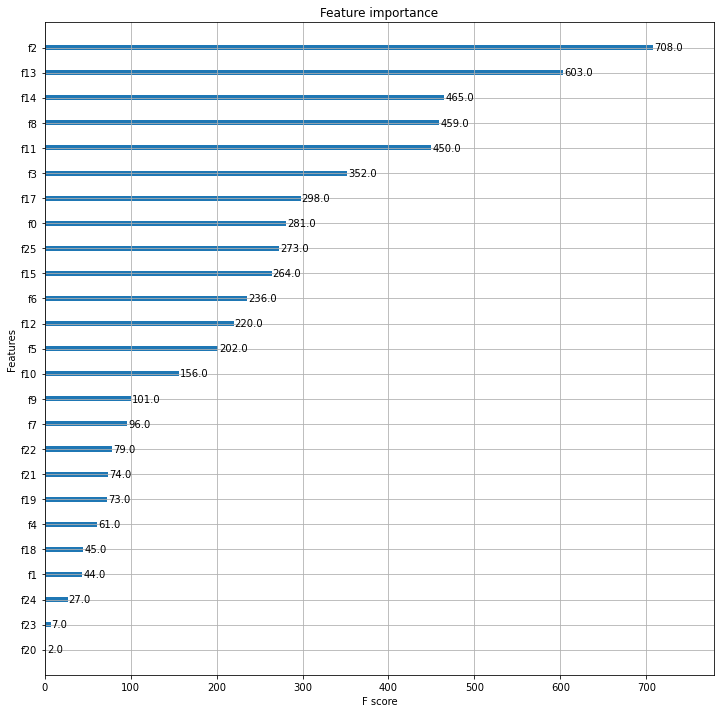

In [51]:
# Feature names go away

from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(12,12))
plot_importance(xgb_model, ax = ax)
plt.show()

In [52]:
y_predict = xgb_model.predict(X_test)

Model Evaluation

In [53]:
def model_evaluate(model, X, Y):
    
    rmse = mean_squared_error(Y, model.predict(X), squared = False)
    
    r2 = r2_score(Y, model.predict(X))
     
    print('RMSE: ', rmse)
    print('r^2: ', r2)
        
    return rmse, r2

In [54]:
rmse_train, r2_train = model_evaluate(xgb_model, X_train, y_train)

RMSE:  0.22596752294984865
r^2:  0.18382666327640973


In [55]:
rmse_test, r2_test = model_evaluate(xgb_model, X_test, y_test)

RMSE:  0.21791458335607933
r^2:  0.19620297143509247
